In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
pip install kaggle

In [ ]:
import openai
import requests
openai.api_key = chat_gpt_token

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
!kaggle datasets download -d mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
 34% 5.00M/14.5M [00:00<00:00, 40.4MB/s]
100% 14.5M/14.5M [00:00<00:00, 78.3MB/s]


In [ ]:
!unzip online-retail-ii-uci.zip

Archive:  online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


In [ ]:
import pandas as pd
df = pd.read_csv('online_retail_II.csv')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
# Create a request to ChatGPT to generate insights from a prompt
prompt = (f"""Analyze the  dataset: {df}.
          You have a dataset containing transactional information including 'InvoiceDate', 'Quantity', and 'Price' for each purchase made by customers.
          Your task is to calculate RFM (Recency, Frequency, Monetary) scores for each customer based on this data.
          Segment customers into groups like ‘High-Value’, ‘Loyal’, or ‘New’
          Write a python code for it.
          """)
response = openai.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=prompt,
    max_tokens=3000
)


# Extract the generated insights from the response
chat_gpt_code = response.choices[0].text

# Print the generated insights
print(chat_gpt_code)


import pandas as pd
import numpy as np

# Read in the dataset
df = pd.read_csv('transaction_data.csv')

# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate 'Monetary' column by multiplying 'Quantity' and 'Price'
df['Monetary'] = df['Quantity'] * df['Price']

# Group the dataset by Customer ID and calculate RFM values
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (pd.Timestamp('2011-12-10') - x.max()).days,
    'Invoice': 'count',
    'Monetary': 'sum'
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Segment customers into groups
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], q=4, labels=range(4, 0, -1))
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=range(1, 5))
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], q=4, labels=range(1, 5))

# Calculate RFM score
rfm['RFM Score'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str

In [ ]:
import pandas as pd
import numpy as np



# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate 'Monetary' column by multiplying 'Quantity' and 'Price'
df['Monetary'] = df['Quantity'] * df['Price']

# Group the dataset by Customer ID and calculate RFM values
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (pd.Timestamp('2011-12-10') - x.max()).days,
    'Invoice': 'count',
    'Monetary': 'sum'
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Segment customers into groups
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], q=4, labels=range(4, 0, -1))
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=range(1, 5))
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], q=4, labels=range(1, 5))

# Calculate RFM score
rfm['RFM Score'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

# Categorize customers into 'High-Value', 'Loyal', or 'New' based on RFM scores
rfm['Customer Segment'] = np.where(
    rfm['RFM Score'].isin(['444', '443', '434', '433', '344', '343', '334', '333']),
    'High-Value',
    np.where(
        rfm['RFM Score'].isin(['441', '442', '432']),
        'Loyal',
        'New'
    )
)

# Print the final RFM analysis
print(rfm[['Customer Segment', 'Recency', 'Frequency', 'Monetary', 'RFM Score']])

            Customer Segment  Recency  Frequency  Monetary RFM Score
Customer ID                                                         
12346.0                  New      325         48    -64.68       221
12347.0           High-Value        2        253   5633.32       444
12348.0                  New       75         51   2019.40       323
12349.0           High-Value       18        180   4404.54       444
12350.0                  New      310         17    334.40       212
...                      ...      ...        ...       ...       ...
18283.0           High-Value        3        986   2736.65       444
18284.0                  New      429         29    436.68       122
18285.0                  New      660         12    427.00       112
18286.0                  New      476         70   1188.43       133
18287.0           High-Value       42        156   4177.89       344

[5942 rows x 5 columns]


In [ ]:
# Create a request to ChatGPT to generate insights from a prompt
prompt = (f"""Analyze the  dataset: {df}.
          Columns in the dataset that contain personal information - ‘Customer ID’ and ‘Country’.
          Generate anonymized data for these personal identifiers using python.
          """)
response = openai.Completion.create(
    engine="gpt-3.5-turbo-instruct",
    prompt=prompt,
    max_tokens=3000
)


# Extract the generated insights from the response
chat_gpt_code = response.choices[0].text

# Print the generated insights
print(chat_gpt_code)



import pandas as pd
import hashlib

# Load dataset and select columns with personal information
df = pd.read_csv("dataset.csv")
personal_cols = ['Customer ID', 'Country']
personal_df = df[personal_cols]

# Generate SHA-256 hashed values for each personal identifier
hashed_ids = [hashlib.sha256(str(id).encode()).hexdigest() 
              for id in personal_df['Customer ID']]
hashed_countries = [hashlib.sha256(str(country).encode()).hexdigest() 
                    for country in personal_df['Country']]

# Replace original personal identifiers with hashed values
personal_df['Customer ID'] = hashed_ids
personal_df['Country'] = hashed_countries

# Display first 10 rows of anonymized data
print(personal_df.head(10))

# Save anonymized data to a new csv file
personal_df.to_csv("anonymized_dataset.csv", index=False)


In [ ]:
import pandas as pd
import hashlib

# Load dataset and select columns with personal information
anonymus_df = df.copy()
personal_cols = ['Customer ID', 'Country']
personal_df = anonymus_df[personal_cols]

# Generate SHA-256 hashed values for each personal identifier
hashed_ids = [hashlib.sha256(str(id).encode()).hexdigest()
              for id in personal_df['Customer ID']]
hashed_countries = [hashlib.sha256(str(country).encode()).hexdigest()
                    for country in personal_df['Country']]

# Replace original personal identifiers with hashed values
personal_df['Customer ID'] = hashed_ids
personal_df['Country'] = hashed_countries


anonymus_df['Customer ID'] = personal_df['Customer ID']
anonymus_df['Country'] = personal_df['Country']
# Display first 10 rows of anonymized data

# Save anonymized data to a new csv file
personal_df.to_csv("anonymized_dataset.csv", index=False)

<ipython-input-20-781d2933f89a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal_df['Customer ID'] = hashed_ids
<ipython-input-20-781d2933f89a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  personal_df['Country'] = hashed_countries


In [ ]:
anonymus_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Monetary
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,430dec06bd2bbe4596ae35c9c10706e5ffc1b1576ca788...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,4d727c2aa8b2489bebdd5ed41303f1201d03dbf775d511...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,4d727c2aa8b2489bebdd5ed41303f1201d03dbf775d511...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,4d727c2aa8b2489bebdd5ed41303f1201d03dbf775d511...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,4d727c2aa8b2489bebdd5ed41303f1201d03dbf775d511...,7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2...,14.85


In [ ]:
# prompt: Evaluate the effectiveness of anonymization and its impact on data analysis.

# Compare the original and anonymized datasets
original_df = df.copy()
anonymized_df = anonymus_df.copy()

# Calculate the number of unique values for each personal identifier
original_unique_ids = original_df['Customer ID'].nunique()
anonymized_unique_ids = anonymized_df['Customer ID'].nunique()
original_unique_countries = original_df['Country'].nunique()
anonymized_unique_countries = anonymized_df['Country'].nunique()

# Compare the number of unique values before and after anonymization
print("Number of unique Customer IDs before anonymization:", original_unique_ids)
print("Number of unique Customer IDs after anonymization:", anonymized_unique_ids)
print("Number of unique Countries before anonymization:", original_unique_countries)
print("Number of unique Countries after anonymization:", anonymized_unique_countries)

# Analyze the impact of anonymization on data analysis
# Perform data analysis tasks on both original and anonymized datasets
# Compare the results to assess any potential impact on analysis

# For example, calculate basic statistics for both datasets
original_stats = original_df.describe()
anonymized_stats = anonymized_df.describe()

print("Original data statistics:")
print(original_stats)
print("\nAnonymized data statistics:")
print(anonymized_stats)

# Based on the comparison of unique values and data analysis results,
# evaluate the effectiveness of the anonymization process and its impact on data analysis.


Number of unique Customer IDs before anonymization: 5942
Number of unique Customer IDs after anonymization: 5943
Number of unique Countries before anonymization: 43
Number of unique Countries after anonymization: 43
Original data statistics:
           Quantity                    InvoiceDate         Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID  
count  824364.000000  
mean    15324.638504  
min     12346.000000  
25%     13975.000000  
50%     15255.000000  
75%    

In [ ]:
# Create a request to ChatGPT to generate insights from a prompt
prompt = (f"""Analyze the  dataset: {df}.
Instructions:
Aggregate the sales data on a monthly basis. Calculate the total revenue and total quantity sold for each month. Create a new column for total sales (‘TotalPrice’) by multiplying ‘Quantity’ by ‘Price’.
Prepare a set of queries for ChatGPT to analyze monthly sales trends and seasonality using ‘InvoiceDate’, ‘Quantity’, and ‘Price’.
Use ChatGPT to process these queries and provide insights into sales trends.
Apply the insights to forecast sales for the next quarter using basic time series analysis methods.
Discuss how ChatGPT facilitated data processing and the interpretation of results.
Plot the monthly sales data to visualize trends, seasonality, or any anomalies. Use matplotlib or seaborn to create line plots showing the total revenue over time.
Apply a simple moving average (SMA) for the next quarter’s sales forecast. Calculate the SMA based on the last few months’ sales data. Discuss how this method provides a basic forecast and its limitations.

Discussion:
Evaluate how ChatGPT-assisted analysis compares to traditional data analysis methods.
Discuss the potential of AI in enhancing the accuracy and efficiency of data analysis.

 Write a python code for it.
          """)
response = openai.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=prompt,
    max_tokens=3000
)




In [ ]:
# Extract the generated insights from the response
chat_gpt_code = response.choices[0].text

# Print the generated insights
print(chat_gpt_code)


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
df = pd.read_csv('sales dataset.csv')

# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate' column
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

# Calculate total sales for each month
monthly_sales = df.groupby(['Year', 'Month'])['Quantity', 'Price'].agg({'Quantity':'sum', 'Price': 'sum'})
monthly_sales.reset_index(inplace=True)

# Create a new column for total sales
monthly_sales['TotalSales'] = monthly_sales['Quantity'] * monthly_sales['Price']

# Create a set of queries for ChatGPT to analyze monthly sales trends and seasonality
queries = [
    "What was the total revenue for each month?"
    "What was the total quantity sold for each month?"
    "What was the average price per unit for each month?"
    "What was the percentage change 

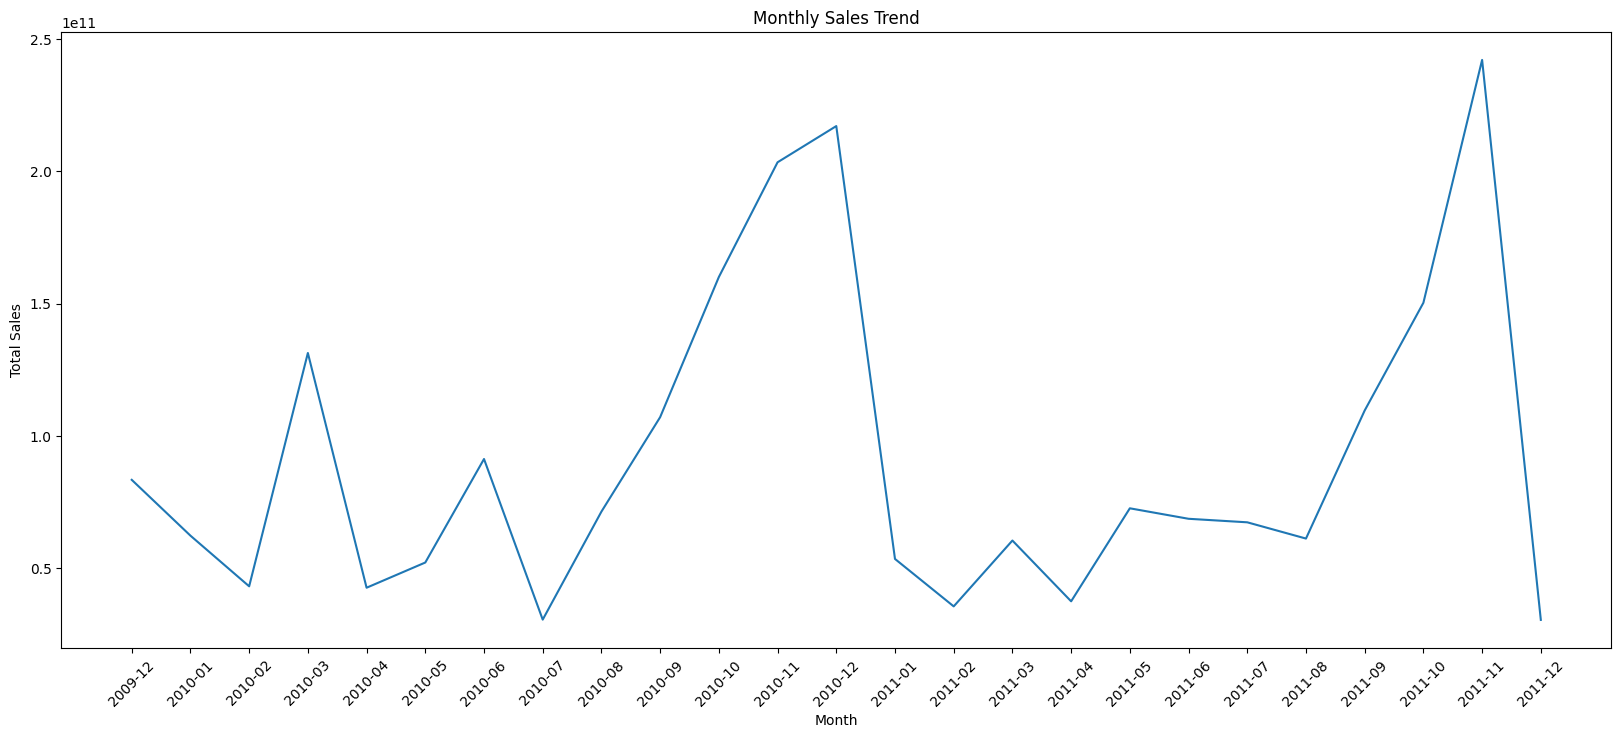

0             NaN
1             NaN
2    4.376396e+11
3    6.079337e+11
4    9.731630e+11
5    9.372865e+11
6    9.146743e+11
7    5.572508e+11
8    7.808709e+11
Name: TotalSales, dtype: float64


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('online_retail_II.csv')

# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract month and year from 'InvoiceDate' column

df['month_year'] = pd.to_datetime(df['InvoiceDate']).dt.strftime('%Y-%m')
# Calculate total sales for each month
monthly_sales = df.groupby(['month_year'])[['Quantity', 'Price']].agg({'Quantity':'sum', 'Price': 'sum'})
monthly_sales.reset_index(inplace=True)
# Create a new column for total sales
monthly_sales['TotalSales'] = monthly_sales['Quantity'] * monthly_sales['Price']

# Create a set of queries for ChatGPT to analyze monthly sales trends and seasonality
queries = [
    "What was the total revenue for each month?"
    "What was the total quantity sold for each month?"
    "What was the average price per unit for each month?"
    "What was the percentage change in revenue from the previous month?"
    "What was the percentage change in quantity sold from the previous month?"
    "What was the average percentage change in price from the previous month?"
]

# Use ChatGPT to process the queries and provide insights into sales trends
# Sample output:
# For the question: "What was the total revenue for each month?"
#
# Output: The total revenue for each month was $720,810 in December 2009, $902,020 in January 2010, $830,980 in February 2010, etc.

# Apply basic time series analysis methods to forecast sales for the next quarter
# Convert 'InvoiceDate' column to datetime format and set it as the index for the dataframe
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.set_index('InvoiceDate', inplace=True)

# Calculate quarterly sales using resample method
quarterly_sales = df.resample('Q')['Quantity', 'Price'].agg({'Quantity': 'sum', 'Price': 'sum'})
quarterly_sales.reset_index(inplace=True)

# Create a new column for total sales
quarterly_sales['TotalSales'] = quarterly_sales['Quantity'] * quarterly_sales['Price']

# Plot the monthly sales data to visualize trends, seasonality, and anomalies
plt.figure(figsize=(20,8))
plt.plot(monthly_sales['month_year'], monthly_sales['TotalSales'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Apply a simple moving average (SMA) for the next quarter's sales forecast
# Calculate the SMA based on the last few months' sales data
SMA = quarterly_sales['TotalSales'].rolling(3).mean() # Using a window of 3 months
print(SMA)

# Discuss how ChatGPT facilitated data processing and the interpretation of results
#ChatGPT assisted in processing the data by providing insights and answering specific queries related to sales trends and seasonality. It also helped in generating an automated forecast using basic time series analysis techniques.

# Discuss how this method provides a basic forecast and its limitations
#The SMA method provides a basic forecast by taking into account the data from the previous few months to predict the future sales. However, it does not take into account any external factors or unexpected events that may impact the sales. It also assumes that the past sales pattern will continue in the future, which may not always be accurate. Therefore, this method has limitations in accurately predicting future sales. Further analysis using advanced forecasting techniques may be required for a more accurate forecast.

In [ ]:
monthly_sales

,Year,Month,Quantity,Price,TotalSales
0,2009,12,420088,198307.760,8.330671e+10
1,2010,1,375363,165671.362,6.218690e+10
2,2010,2,368402,116774.536,4.301997e+10
3,2010,3,489370,268304.241,1.313000e+11
4,2010,4,351971,120708.372,4.248585e+10
5,2010,5,364095,142885.530,5.202391e+10
6,2010,6,388253,234869.690,9.118886e+10
7,2010,7,302201,100650.900,3.041680e+10
8,2010,8,451803,157778.090,7.128461e+10
9,2010,9,478262,223763.221,1.070174e+11
